# Assignment12
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment12
# Import packages for plotting graphs and manipulating data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions to solve Least-square problem:
## Define fun function
This function returns the function $f(x) = | x | \cdot \sin(x)$.

In [2]:
def fun(x):
    f = np.abs(x) * np.sin(x)
    return f

## Define makeA function
This function makes matrix A that is $\begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^p \\ 1 & x_2 & x_2^2 & \cdots & x_2^p \\ &&\vdots&& \\ 1 & x_n & x_n^2 & \cdots & x_n^p \\ 1 & 0 & 0 &\cdots & 0 \\ 0 & 1 & 0 &\cdots & 0 \\ &&\vdots&& \\ 0 & 0 & 0 &\cdots & 1 \end{bmatrix}$

In [3]:
def makeA(x, p, lamb):
    A = np.array([[x1**pi for pi in range(p)] for x1 in x])
    e = np.sqrt(lamb)*np.eye(p)
    A = np.concatenate((A, e), axis=0)
    return A

## Define makeb function
This function makes matrix b that is $\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \\ 0 \\ \vdots \\ 0\end{bmatrix}$

In [4]:
def makeb(y, p):
    return np.concatenate((y, np.zeros(p)), axis=None)

## Define myfunc function
This function returns the estimated values.

In [5]:
def myfunc(sols, x):
    f = 0
    for i, sol in enumerate(sols):
        f += sol * (x**i)
    return f

## Define calLoss function
This function calculates loss.

In [6]:
def calLoss(f, real):
    if f.shape != real.shape: 
        return np.inf
    sum = 0
    for (y1, y2) in zip(f, real):
        sum += (y1 - y2)**2
    return sum

# Solve Least-square problem:
## Set variables
Make data y1 as $y1 = |x|\cdot\sin\left(x\right)$, and make y2 as noisy data with $\sigma=5$.

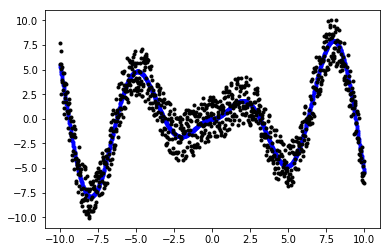

In [7]:
num = 1001
std = 5 

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-10,10,num)
y1 = fun(x) # clean points
y2 = y1 + nn * std # noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

## For $p = 1, \cdots, 10$, calculate polynomials and Loss :

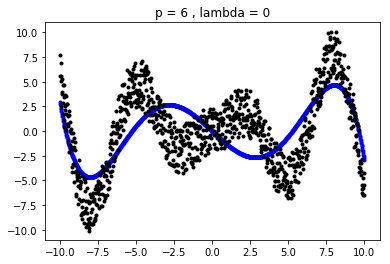

Loss : 9442.345020229906


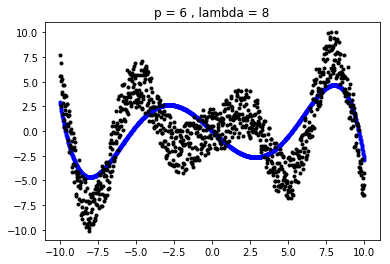

Loss : 9442.121935754078


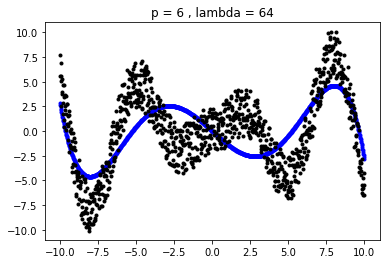

Loss : 9444.590174339355


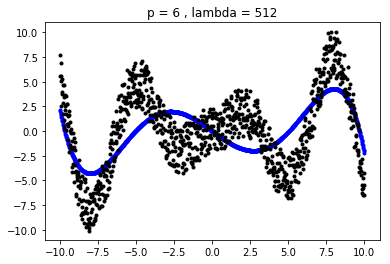

Loss : 9615.072442941595


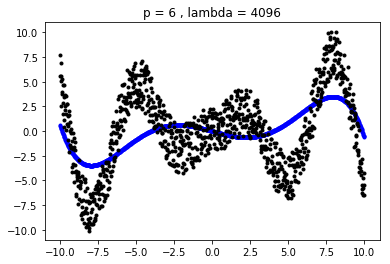

Loss : 11188.441641831785


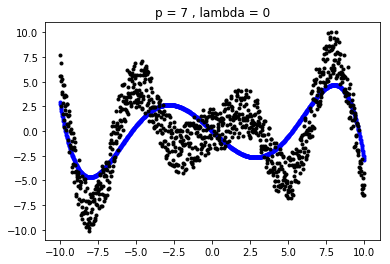

Loss : 9442.345020229905


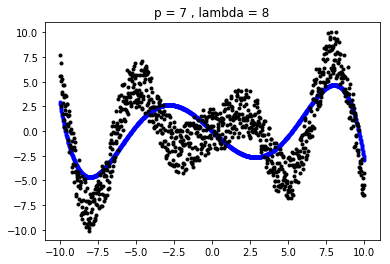

Loss : 9442.12193575408


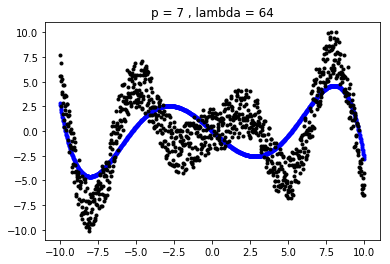

Loss : 9444.590174339353


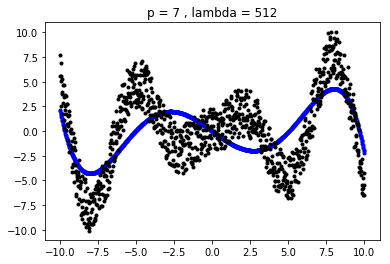

Loss : 9615.072442941597


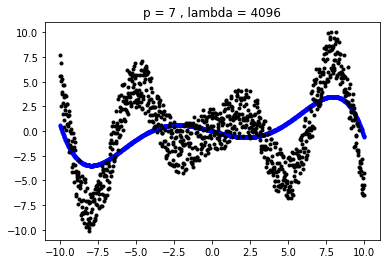

Loss : 11188.441641831787


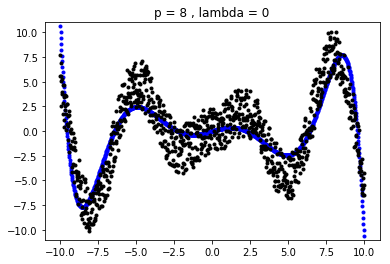

Loss : 4627.884487263514


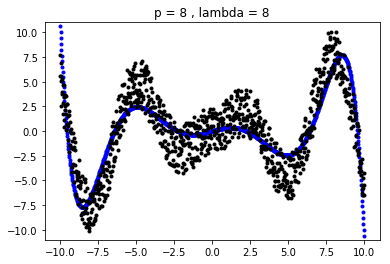

Loss : 4627.819591348477


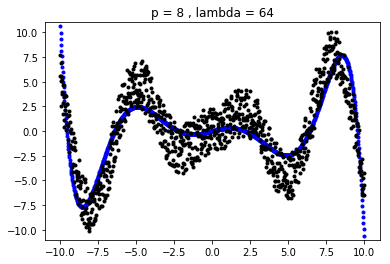

Loss : 4628.166402687012


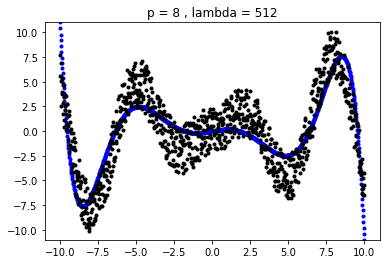

Loss : 4648.760128134182


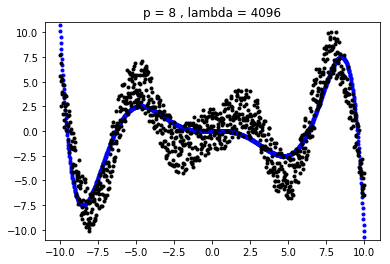

Loss : 4728.040221563494


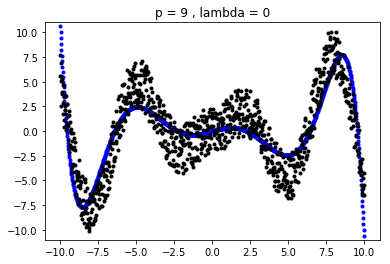

Loss : 4627.884487263511


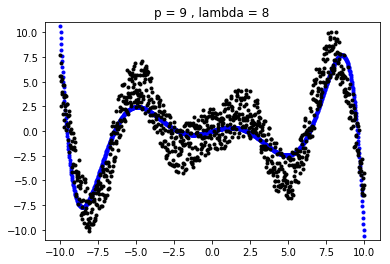

Loss : 4627.819591348466


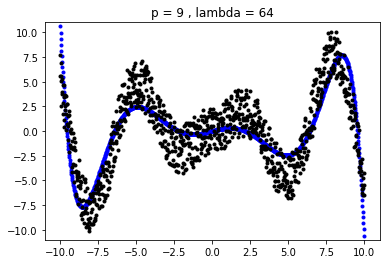

Loss : 4628.166402687006


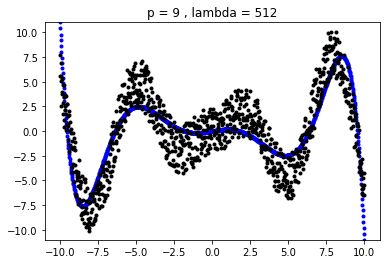

Loss : 4648.760128134185


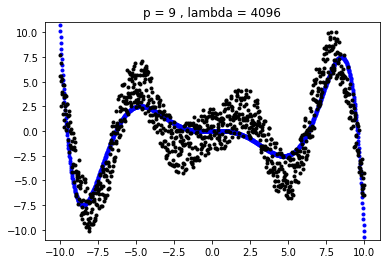

Loss : 4728.040221563491


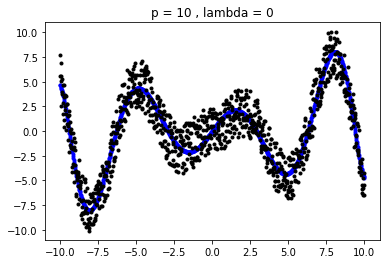

Loss : 2238.9302232901837


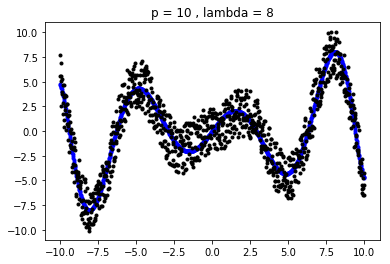

Loss : 2237.9577227515674


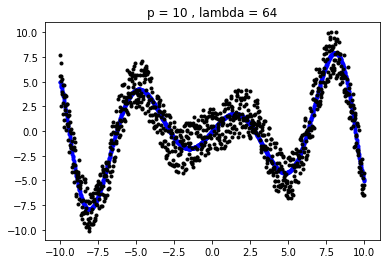

Loss : 2262.07095678904


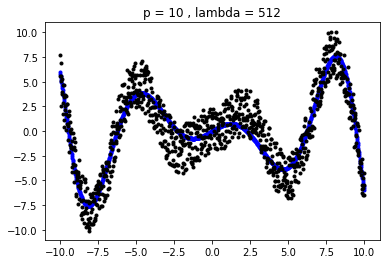

Loss : 2777.1192720526988


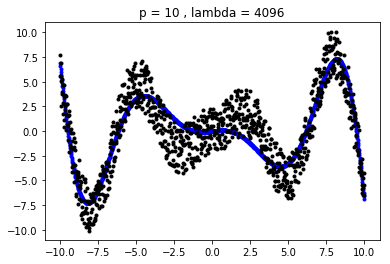

Loss : 3721.1404026759365


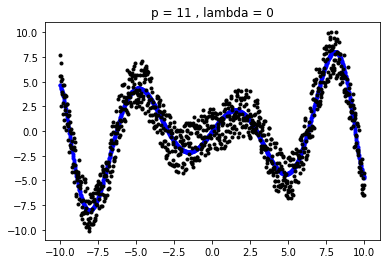

Loss : 2238.930223290183


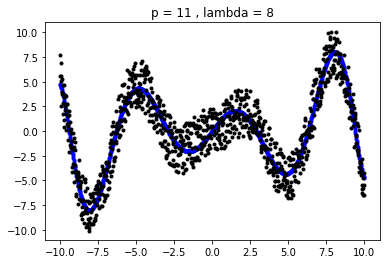

Loss : 2237.9577227515692


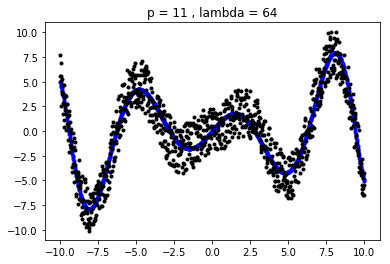

Loss : 2262.0709567890394


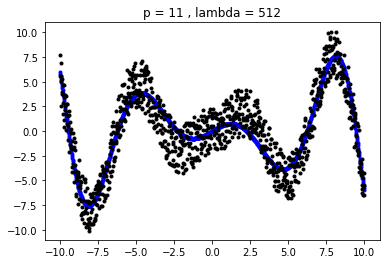

Loss : 2777.119272052697


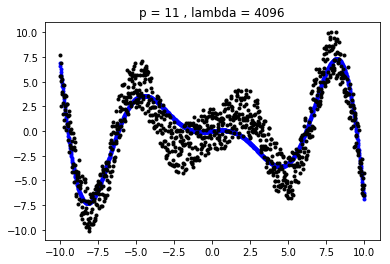

Loss : 3721.1404026759433


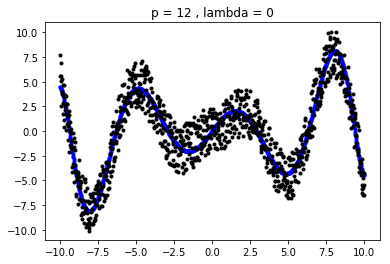

Loss : 2240.7241911085116


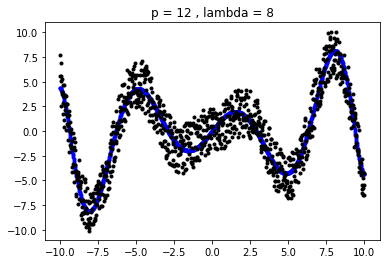

Loss : 2242.1128240461603


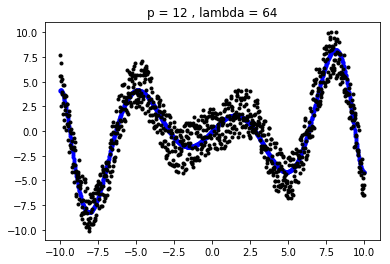

Loss : 2289.0831989094195


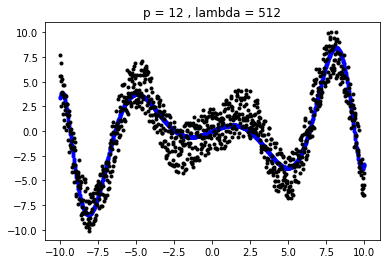

Loss : 2728.0774777271395


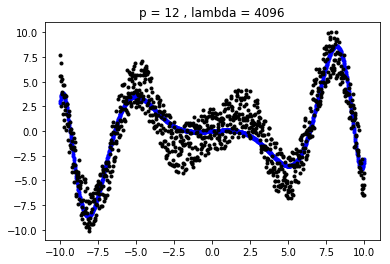

Loss : 3171.320884544173


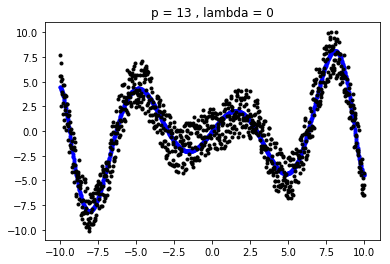

Loss : 2240.7241911085102


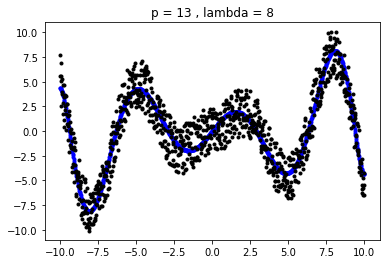

Loss : 2242.1128240461576


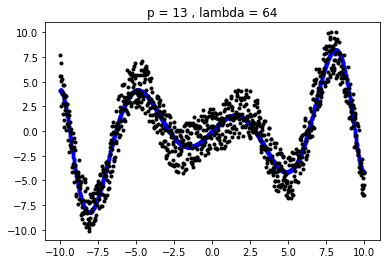

Loss : 2289.083198909416


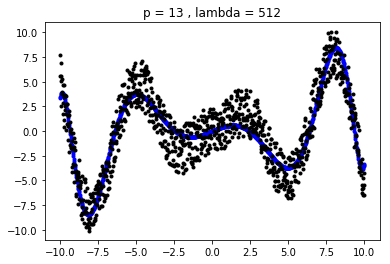

Loss : 2728.0774777271376


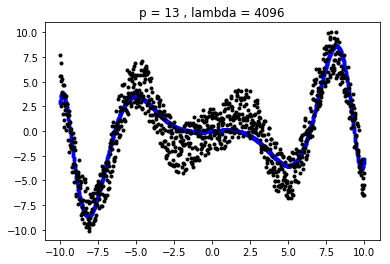

Loss : 3171.3208845441723


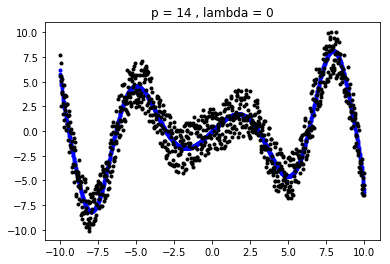

Loss : 2119.873471930999


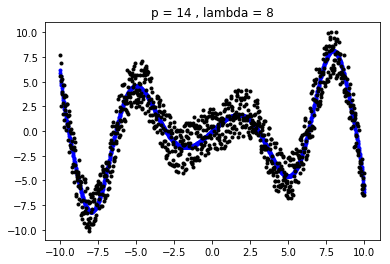

Loss : 2121.489124691219


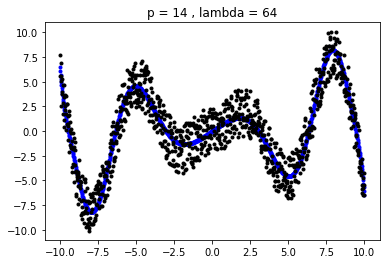

Loss : 2154.754711642317


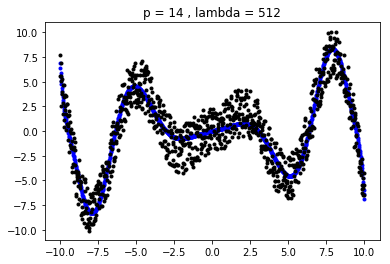

Loss : 2334.079889894737


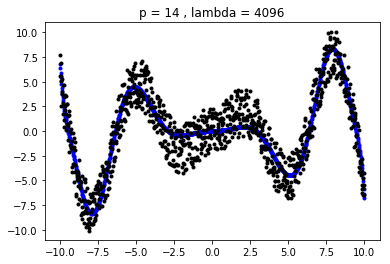

Loss : 2455.675046937098


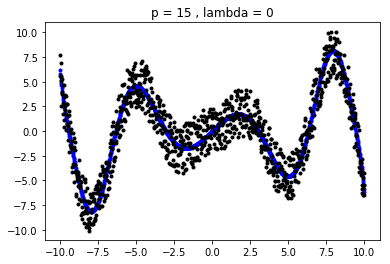

Loss : 2119.873471931003


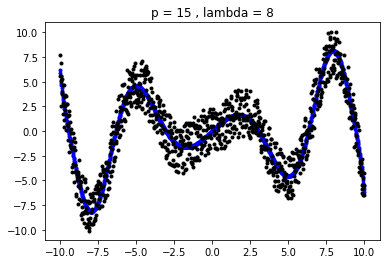

Loss : 2121.4891246912084


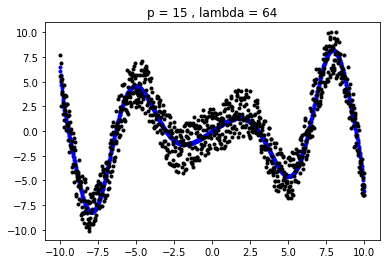

Loss : 2154.7547116423116


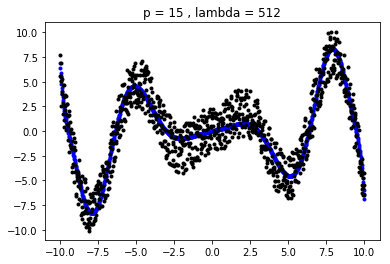

Loss : 2334.0798898946973


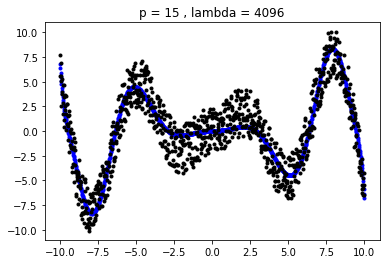

Loss : 2455.6750469371173


In [8]:
# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

for i in range(6, 16):
    for l in [0, 8, 64, 512, 4096]:
        A = makeA(x, i, l)
        Q, R = np.linalg.qr(A)
        b = makeb(y1, i)
        sol = np.linalg.solve(R, np.matmul(Q.T, b))
        f = myfunc(sol, x)

        plt.xlim(-11,11)
        plt.ylim(-11,11)
        plt.plot(x, f, 'b.', x, y2, 'k.')
        plt.title("p = "+str(i)+" , lambda = "+str(l))
        plt.show()
        
        print("Loss : "+str(calLoss(f, y2)))